# Домашнее задание № 5

### Автор: Кузнецов С.И.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Загружаем датасет

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Составляем датасет из числовых фичей

In [4]:
X = data[[c for c in data.columns if c not in {'Id', 'SalePrice'} and data[c].dtype != 'O']]
X = X.fillna(X.mean())
y = data.SalePrice

### Построим модель Random forest

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [6]:
params = {'n_estimators':[100, 200, 500],
          'max_depth': list(range(5, 10)),
          'min_samples_split': list(range(2, 4))}

In [7]:
rfr = RandomForestRegressor()
gs = GridSearchCV(rfr, params, scoring='r2', cv=10)

In [180]:
%%time
gs.fit(X, y)

CPU times: user 30min 32s, sys: 12.5 s, total: 30min 45s
Wall time: 38min 4s


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 500], 'max_depth': [5, 6, 7, 8, 9], 'min_samples_split': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [11]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

## Выведем важность признаков

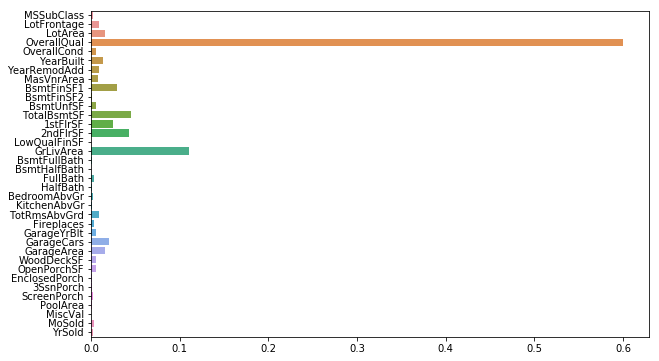

In [11]:
plt.figure(figsize=(10,6))
ax = sns.barplot(y=X.columns, x=gs.best_estimator_.feature_importances_)

In [12]:
gs.best_score_

0.8593207634973316

### Обучим модель линейной регрессии (Лассо)

In [13]:
from sklearn.linear_model import Lasso

In [14]:
lasso_params = {'alpha': [1.0, 5.0, 10.0, 50.0, 100.0], 'tol': [1e-7, 1e-8, 1e-9]}

In [15]:
lr = Lasso(normalize=True)
gs_lasso = GridSearchCV(lr, lasso_params, scoring='r2', cv=10)

In [16]:
gs_lasso.fit(X, y)

/home/sergmath/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/sergmath/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/sergmath/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/sergmath/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective di

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1.0, 5.0, 10.0, 50.0, 100.0], 'tol': [1e-07, 1e-08, 1e-09]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [17]:
gs_lasso.best_estimator_

Lasso(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=1e-09, warm_start=False)

In [18]:
gs_lasso.best_score_

0.7977260969504895

### Обучим дерево решений

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
dtr_params = {'max_depth': list(np.arange(2, 20)), 
              'min_samples_split': list(np.arange(2, 20))}

In [21]:
dtr = DecisionTreeRegressor()
gs_dtr = GridSearchCV(dtr, dtr_params, scoring='r2', cv=10)

In [22]:
gs_dtr.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [23]:
gs_dtr.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [24]:
gs_dtr.best_score_

0.7749547504853738

### Применим стекинг

Разобъем выборку на обучающую и тестовую. Размер тестовой выборки: 20%

In [133]:
test_ind = set(np.random.choice(X.index, round(X.shape[0] * 0.2), replace = False))
X_test, y_test = X.loc[test_ind], y.loc[test_ind]
X_train, y_train = X.loc[set(X.index) - test_ind], y.loc[set(X.index) - test_ind]

In [134]:
def get_meta_features(clf, X_train, y_train, X_test, stack_cv):
    meta_train = np.zeros_like(y_train, dtype=float)
    meta_test = np.zeros_like(y_test, dtype=float)
    
    print(clf)
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)):
        print(i)
        clf.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
        meta_train[test_ind] = clf.predict(X_train.iloc[test_ind])
        meta_test += clf.predict(X_test)
    
    return meta_train, meta_test / stack_cv.n_splits

In [135]:
from sklearn.model_selection import StratifiedKFold

### Обучим мета-фичи

In [136]:
stack_cv = StratifiedKFold(n_splits=10)

# Модель Random Forest Regressor:
rf_meta_train, rf_meta_test = get_meta_features(gs.best_estimator_, X_train, y_train, X_test, stack_cv)

# Модель Lasso Regressor:
lasso_meta_train, lasso_meta_test = get_meta_features(gs_lasso.best_estimator_, 
                                                      X_train, y_train, X_test, stack_cv)

# Модель Decision Tree Regressor:
dtr_meta_train, dtr_meta_test = get_meta_features(gs_dtr.best_estimator_,
                                                  X_train, y_train, X_test, stack_cv)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


/home/sergmath/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0
1
2
3
4
5
6
7
8
9
Lasso(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=1e-09, warm_start=False)


/home/sergmath/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0
1
2
3
4
5
6
7
8
9
DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


/home/sergmath/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0
1
2
3
4
5
6
7
8
9


In [137]:
X_train['rf_meta'] = rf_meta_train
X_train['lasso_meta'] = lasso_meta_train
X_train['dtr_meta'] = dtr_meta_train

X_test['rf_meta'] = rf_meta_test
X_test['lasso_meta'] = lasso_meta_test
X_test['dtr_meta'] = dtr_meta_test

### Построим линейную регрессию на мета-фичах

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 

In [139]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train[['rf_meta', 'lasso_meta', 'dtr_meta']])
X_test_scaled = sc.transform(X_test[['rf_meta', 'lasso_meta', 'dtr_meta']])

In [145]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr.coef_

array([64755.16619753,  9501.42933444, -4651.60950243])

### Точность модели на тестовой выборке

In [141]:
from sklearn.metrics import r2_score

In [143]:
for m in ['rf_meta', 'lasso_meta', 'dtr_meta']:
    print('{}:{:.4f}'.format(m, r2_score(y_test, X_test[m])))

rf_meta:0.8616
lasso_meta:0.8028
dtr_meta:0.8541


In [144]:
r2_score(y_test, lr.predict(X_test_scaled))

0.8676798483316635

**Вывод:** Стекинг дает незначительный прирост в точности модели. 